In [72]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/sandeepk/Downloads/Air_Traffic_Passenger_Statistics.csv')

In [2]:
#Recieve na reporting
ls = list(df.columns)
for x in ls:
  if sum(df[x].isna()) >0:
    print(x)
    print(sum(df[x].isna()))
    print()

Operating Airline IATA Code
54

Published Airline IATA Code
54



In [3]:
fl_cnt=[]
fl_cnt.append(df[df['GEO Summary'] == 'Domestic'].count().max())
fl_cnt.append(df[df['GEO Summary'] == 'International'].count().max())

dfg_flights = df.groupby('GEO Summary').agg({'Passenger Count': 'mean'}).round(0)
dfg_flights['Flight Count'] = fl_cnt
dfg_flights

,Passenger Count,Flight Count
GEO Summary,,
Domestic,58330.0,5797
International,10931.0,9210


In [38]:
fl_cnt=[]
fl_cnt.append(df[df['GEO Summary'] == 'Domestic'].count().max())
fl_cnt.append(df[df['GEO Summary'] == 'International'].count().max())
fl_cnt

[5797, 9210]

In [55]:
#Top 10 in Domestic
def top_passengers(df, flight):
    df_eval = df[df['GEO Summary'] == flight]

    df_eval.sort_values(by=['Passenger Count'], ascending=False, inplace=True)
    top = df_eval.head(10)
    return top[['Operating Airline', 'GEO Region', 'Terminal', 'Passenger Count']]
    
top_passengers(df, 'Domestic')

/var/folders/2n/y8fl7fr16hs_g_085s9fnpqm0000gn/T/ipykernel_40522/1106578693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval.sort_values(by=['Passenger Count'], ascending=False, inplace=True)


,Operating Airline,GEO Region,Terminal,Passenger Count
11331,United Airlines,US,Terminal 3,659837
11332,United Airlines,US,Terminal 3,629003
11218,United Airlines,US,Terminal 3,625885
11219,United Airlines,US,Terminal 3,622871
11566,United Airlines,US,Terminal 3,573619
11567,United Airlines,US,Terminal 3,558030
11792,United Airlines,US,Terminal 3,556208
11791,United Airlines,US,Terminal 3,553433
11449,United Airlines,US,Terminal 3,548374
11450,United Airlines,US,Terminal 3,544302


In [74]:
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [75]:
import folium.map

my_map = folium.Map()

In [5]:
table['name']

NameError: name 'table' is not defined

In [6]:
conditions = [
    df['GEO Region'] == 'US',
    df['GEO Region'] == 'Canada',
    df['GEO Region'] == 'Asia',
    df['GEO Region'] == 'Europe',
    df['GEO Region'] == 'Australia / Oceania',
    df['GEO Region'] == 'Mexico',
    df['GEO Region'] == 'Central America',
    df['GEO Region'] == 'Middle East',
    df['GEO Region'] == 'South America',
    
    
]

values = ['United States of America', 'Canada', 'China', \
         'Spain', 'Australia', 'Mexico', 'Nicaragua', \
         'Saudi Arabia', 'Brazil']

df['Country'] = np.select(conditions, values) 

In [10]:
table = world.merge(df, how='left', left_on=['name'], right_on=['Country'])
#table = table.dropna(subset = ['Passenger Count'])

In [30]:
table['Passenger Count'].fillna(0,inplace=True)


<AxesSubplot:>

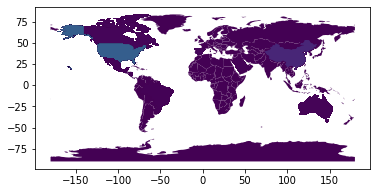

In [31]:
table = table[(table.name!='Antartica')]
table.plot(column='Passenger Count')

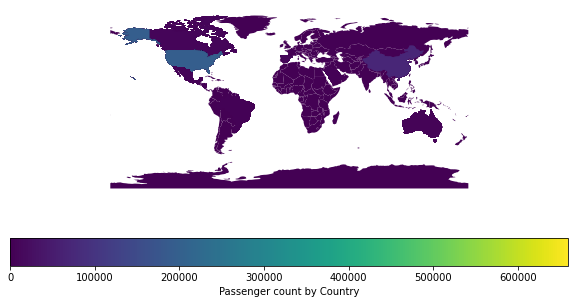

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (10,5))

#cmap='PuRd'
table.plot(column='Passenger Count', ax=ax, legend=True,
          legend_kwds={'label': "Passenger count by Country",
                        'orientation': "horizontal"})
ax.set_axis_off();

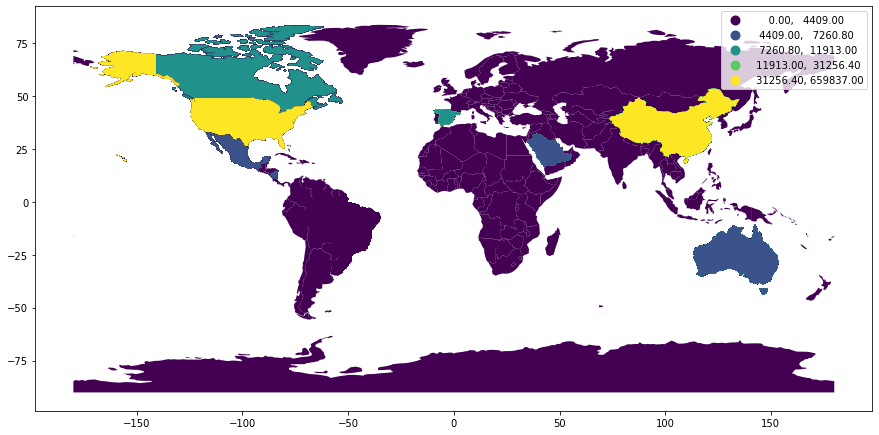

In [50]:
table.plot(
    column='Passenger Count',
    legend=True,
    scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);

<AxesSubplot:>

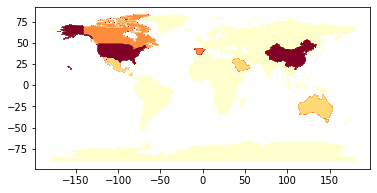

In [63]:
## Continent
table.plot(column='Passenger Count', scheme='quantiles', cmap='YlOrRd',
           figsize=(15, 10),
           missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);

In [70]:
table

,continent,geometry,Passenger Count
0,Oceania,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.0
1,Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.0
2,Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0
3,North America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",35156.0
4,North America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",34090.0
...,...,...,...
15170,Europe,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.0
15171,Europe,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.0
15172,Europe,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.0
15173,North America,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.0


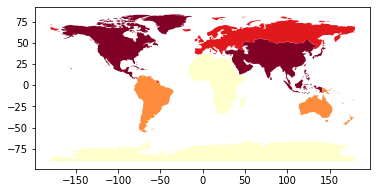

In [71]:
table = table[['continent', 'geometry', 'Passenger Count']]
continents = table.dissolve(by='continent', aggfunc='sum')

continents.plot(column = 'Passenger Count', scheme='quantiles', cmap='YlOrRd');

In [55]:
world = world = world[['continent', 'geometry']]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [20]:
table = table[(table.continent!='Antartica')]

In [22]:
table[table['Country']== 'Antartica']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,...,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,Country


In [73]:
world


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## Abortion Statistics

In [88]:
#America
abort_df = pd.read_csv('/Users/sandeepk/Downloads/Global Abortion Incidence Dataset.csv')
amer_df = abort_df[abort_df['country']== 'United States of America']

killed = amer_df.groupby('country').agg({'numberofabortions':'sum'})
print(killed.iloc[[0]])

                          numberofabortions
country                                    
United States of America         78700922.0


In [102]:
amer_yrs = amer_df.groupby('yearstart').agg({'numberofabortions':'sum'})
amer_yrs.sort_values(by=['numberofabortions'], ascending=False, inplace=True)

amer_yrs['country'] = 'United States of America'

In [120]:
list_scode = list(set(abort_df['country']))
list_scode
import plotly.graph_objects as go

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_scode)).as_hex())

fig = go.Figure()
for d,p in zip(list_scode, pal):
    fig.add_trace(go.Scatter(x = abort_df[abort_df['country']==d]['yearstart'],
                             y = abort_df[abort_df['country']==d]['numberofabortions'],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy 

fig.show()